In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Данные

Возьмите данные отсюда: https://inclass.kaggle.com/c/si650winter11

В этот раз это inclass-соревнование, а не настоящий kaggle. В задачах на текст Kaggle обычно не мелочится, и сгружает гигабайты в выборках. Конкретно же этот конкурс из университета Мичигана вполне легко разворачивается на домашнем компьютере.

In [3]:
import codecs
fileObj = codecs.open( 'data/TextWorks/training.txt', "r", "utf_8_sig" )
lines = fileObj.readlines()

#with open( 'data/TextWorks/training.txt'
#          # Путь к вашему training.txt-файлу
#         ) as handle:
#    lines = handle.readlines()

data = [x.strip().split('\t') for x in lines]

df = pd.DataFrame(data=data, columns=['target', 'text'])
df.target = df.target.astype(np.int32)
df = df.drop_duplicates().reset_index(drop=True)

In [4]:
#with open( 'data/TextWorks/testdata.txt'
#          # Путь к вашему test.txt-файлу
#         ) as handle:
#    lines = handle.readlines()

fileObj = codecs.open( 'data/TextWorks/testdata.txt', "r", "utf_8_sig" )
lines = fileObj.readlines()

data = [x.strip().split('\t') for x in lines]

df_test = pd.DataFrame(data=data, columns=['text'])
df_test = df_test.drop_duplicates().reset_index(drop=True)

In [5]:
df.head()

,target,text
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,I liked the Da Vinci Code but it ultimatly did...
4,1,that's not even an exaggeration ) and at midni...


<div class="panel panel-info" style="margin: 50px 0 0 0">
    <div class="panel-heading">
        <h3 class="panel-title">Задание 1.</h3> 
    </div>
</div>

### Токенизация

In [7]:
#Загрузка модулей nltk через интерфейс проги
#import nltk
#nltk.download()

In [8]:
from nltk import word_tokenize, wordpunct_tokenize, sent_tokenize

In [9]:
s = df.text[1]
s

"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."

In [10]:
import re

In [11]:
tokens = [x.lower() for x in word_tokenize(s) if re.match("[a-zA-Z\d]+", x) is not None]
tokens

['this',
 'was',
 'the',
 'first',
 'clive',
 'cussler',
 'i',
 'ever',
 'read',
 'but',
 'even',
 'books',
 'like',
 'relic',
 'and',
 'da',
 'vinci',
 'code',
 'were',
 'more',
 'plausible',
 'than',
 'this']

### Стоп-слова

In [12]:
from nltk.corpus import stopwords

In [14]:
[print(x, end='\t') for x in stopwords.words('english')];

i	me	my	myself	we	our	ours	ourselves	you	your	yours	yourself	yourselves	he	him	his	himself	she	her	hers	herself	it	its	itself	they	them	their	theirs	themselves	what	which	who	whom	this	that	these	those	am	is	are	was	were	be	been	being	have	has	had	having	do	does	did	doing	a	an	the	and	but	if	or	because	as	until	while	of	at	by	for	with	about	against	between	into	through	during	before	after	above	below	to	from	up	down	in	out	on	off	over	under	again	further	then	once	here	there	when	where	why	how	all	any	both	each	few	more	most	other	some	such	no	nor	not	only	own	same	so	than	too	very	s	t	can	will	just	don	should	now	d	ll	m	o	re	ve	y	ain	aren	couldn	didn	doesn	hadn	hasn	haven	isn	ma	mightn	mustn	needn	shan	shouldn	wasn	weren	won	wouldn	

In [16]:
[print(x, end='\t') for x in stopwords.words('russian')];

и	в	во	не	что	он	на	я	с	со	как	а	то	все	она	так	его	но	да	ты	к	у	же	вы	за	бы	по	только	ее	мне	было	вот	от	меня	еще	нет	о	из	ему	теперь	когда	даже	ну	вдруг	ли	если	уже	или	ни	быть	был	него	до	вас	нибудь	опять	уж	вам	ведь	там	потом	себя	ничего	ей	может	они	тут	где	есть	надо	ней	для	мы	тебя	их	чем	была	сам	чтоб	без	будто	чего	раз	тоже	себе	под	будет	ж	тогда	кто	этот	того	потому	этого	какой	совсем	ним	здесь	этом	один	почти	мой	тем	чтобы	нее	сейчас	были	куда	зачем	всех	никогда	можно	при	наконец	два	об	другой	хоть	после	над	больше	тот	через	эти	нас	про	всего	них	какая	много	разве	три	эту	моя	впрочем	хорошо	свою	этой	перед	иногда	лучше	чуть	том	нельзя	такой	им	более	всегда	конечно	всю	между	

In [17]:
throwed = [x for x in tokens if x in stopwords.words('english')]
throwed

['this', 'was', 'the', 'i', 'but', 'and', 'were', 'more', 'than', 'this']

In [18]:
filtered_tokens = [x for x in tokens if x not in stopwords.words('english')]
filtered_tokens

['first',
 'clive',
 'cussler',
 'ever',
 'read',
 'even',
 'books',
 'like',
 'relic',
 'da',
 'vinci',
 'code',
 'plausible']

### Лемматизация (Приведение к единственному числу именительного падежа)

In [19]:
from nltk import WordNetLemmatizer

In [20]:
wnl = WordNetLemmatizer()

In [21]:
lemmatized = [wnl.lemmatize(x, pos='v') for x in filtered_tokens] # default is Verb

for a,b in zip(filtered_tokens, lemmatized):
    print(a.rjust(10), '->', b.ljust(10), '' if a == b else '<- processed!')

     first -> first      
     clive -> clive      
   cussler -> cussler    
      ever -> ever       
      read -> read       
      even -> even       
     books -> book       <- processed!
      like -> like       
     relic -> relic      
        da -> da         
     vinci -> vinci      
      code -> code       
 plausible -> plausible  


In [22]:
lemmatized = [wnl.lemmatize(x) for x in filtered_tokens] # default is Noun

for a,b in zip(filtered_tokens, lemmatized):
    print(a.rjust(10), '->', b.ljust(10), '' if a == b else '<- processed!')

     first -> first      
     clive -> clive      
   cussler -> cussler    
      ever -> ever       
      read -> read       
      even -> even       
     books -> book       <- processed!
      like -> like       
     relic -> relic      
        da -> da         
     vinci -> vinci      
      code -> code       
 plausible -> plausible  


In [23]:
#Сделаем разделение по частям речи
from nltk import pos_tag

In [24]:
pos_tag(filtered_tokens)

[('first', 'RB'),
 ('clive', 'JJ'),
 ('cussler', 'NN'),
 ('ever', 'RB'),
 ('read', 'VBD'),
 ('even', 'RB'),
 ('books', 'NNS'),
 ('like', 'IN'),
 ('relic', 'JJ'),
 ('da', 'NN'),
 ('vinci', 'NN'),
 ('code', 'NN'),
 ('plausible', 'JJ')]

In [25]:
from nltk.help import upenn_tagset

In [26]:
#Описание сокращений
#upenn_tagset()

In [27]:
from nltk.corpus import wordnet as wn

In [28]:
convert_tag = lambda t: { 'N': wn.NOUN, 'V': wn.VERB, 'R': wn.ADV, 'J': wn.ADJ, 'S': wn.ADJ_SAT }.get(t[:1], wn.NOUN)

In [29]:
lemmatized = [wnl.lemmatize(word, convert_tag(tag)) for word, tag in pos_tag(filtered_tokens)]

for a,b in zip(filtered_tokens, lemmatized):
    print(a.rjust(10), '->', b.ljust(10), '' if a == b else '<- processed!')

     first -> first      
     clive -> clive      
   cussler -> cussler    
      ever -> ever       
      read -> read       
      even -> even       
     books -> book       <- processed!
      like -> like       
     relic -> relic      
        da -> da         
     vinci -> vinci      
      code -> code       
 plausible -> plausible  


### Стемминг (усечение окончаний)

In [30]:
from nltk.stem import SnowballStemmer, LancasterStemmer, PorterStemmer

In [31]:
sbs = SnowballStemmer('english')

stemmed = [sbs.stem(x) for x in filtered_tokens]

for a,b in zip(filtered_tokens, lemmatized):
    print(a.rjust(10), '->', b.ljust(10), '' if a == b else '<- processed!')

     first -> first      
     clive -> clive      
   cussler -> cussler    
      ever -> ever       
      read -> read       
      even -> even       
     books -> book       <- processed!
      like -> like       
     relic -> relic      
        da -> da         
     vinci -> vinci      
      code -> code       
 plausible -> plausible  


In [32]:
sbs = PorterStemmer()

stemmed = [sbs.stem(x) for x in filtered_tokens]

for a,b in zip(filtered_tokens, lemmatized):
    print(a.rjust(10), '->', b.ljust(10), '' if a == b else '<- processed!')

     first -> first      
     clive -> clive      
   cussler -> cussler    
      ever -> ever       
      read -> read       
      even -> even       
     books -> book       <- processed!
      like -> like       
     relic -> relic      
        da -> da         
     vinci -> vinci      
      code -> code       
 plausible -> plausible  


In [33]:
sbs = LancasterStemmer()

stemmed = [sbs.stem(x) for x in filtered_tokens]

for a,b in zip(filtered_tokens, lemmatized):
    print(a.rjust(10), '->', b.ljust(10), '' if a == b else '<- processed!')

     first -> first      
     clive -> clive      
   cussler -> cussler    
      ever -> ever       
      read -> read       
      even -> even       
     books -> book       <- processed!
      like -> like       
     relic -> relic      
        da -> da         
     vinci -> vinci      
      code -> code       
 plausible -> plausible  


In [34]:
sbs = SnowballStemmer('english')

def process_by_far(s):
    s = [x.lower() for x in word_tokenize(s) if re.match("[a-zA-Z\d]+", x) is not None] # токенизация
    s = [x for x in s if x not in stopwords.words('english')] # стоп-слова
    s = [sbs.stem(x) for x in s] # стемминг
    return ' '.join(s)

In [35]:
df['cleansed_text'] = df.text.apply(process_by_far)

In [36]:
df.head()

,target,text,cleansed_text
0,1,The Da Vinci Code book is just awesome.,da vinci code book awesom
1,1,this was the first clive cussler i've ever rea...,first clive cussler ever read even book like r...
2,1,i liked the Da Vinci Code a lot.,like da vinci code lot
3,1,I liked the Da Vinci Code but it ultimatly did...,like da vinci code ultimat n't seem hold
4,1,that's not even an exaggeration ) and at midni...,even exagger midnight went wal-mart buy da vin...


### Частотный словарь

In [37]:
from toolz.itertoolz import concat

In [38]:
all_tokens = list(concat(df.cleansed_text.str.split()))

In [39]:
from nltk.probability import FreqDist

In [40]:
fd = FreqDist(all_tokens)

In [41]:
fd.most_common(10)

[('vinci', 391),
 ('da', 388),
 ('brokeback', 388),
 ('code', 377),
 ('mountain', 375),
 ('harri', 353),
 ('potter', 346),
 ('love', 339),
 ('mission', 289),
 ('imposs', 288)]

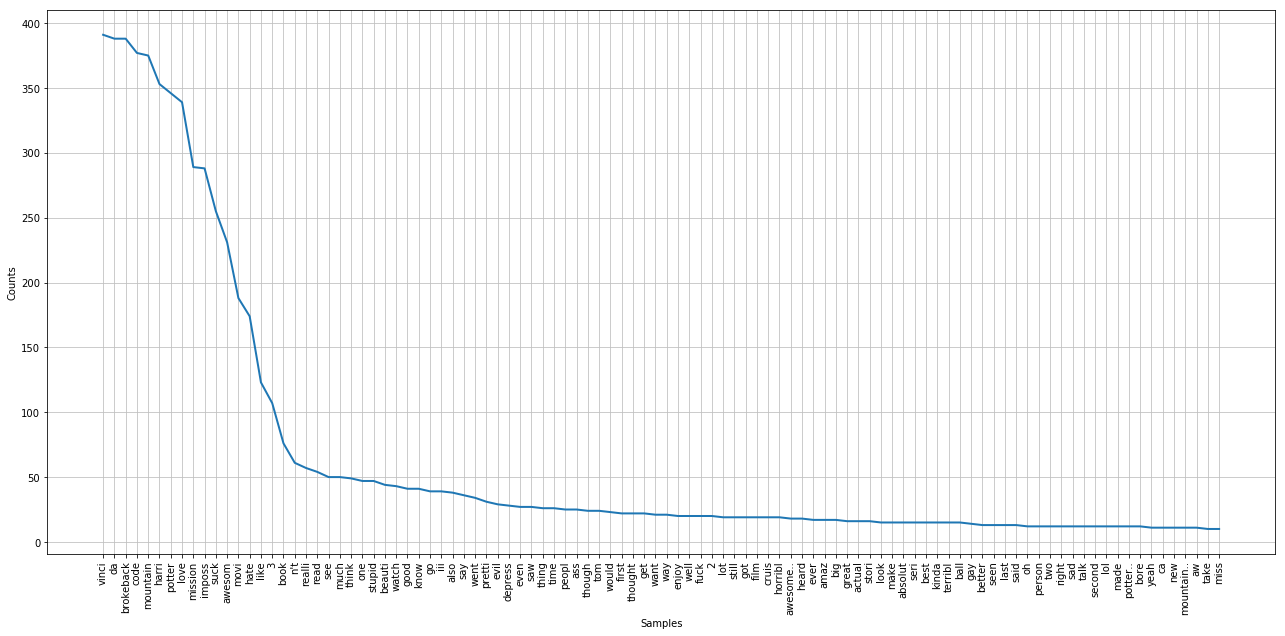

In [44]:
plt.figure(figsize=(22, 10));
fd.plot(100, cumulative=False)

In [45]:
fd.hapaxes()[:3] # - тут все слова, что встретились лишь единожды

['clive', 'cussler', 'relic']

In [46]:
len(fd.keys()), len(fd.hapaxes())

(1863, 1184)

In [49]:
#удаляем редко встречающиеся слова
df['frequent_cleansed'] = df.cleansed_text.str.split()\
    .apply(lambda ss: ' '.join([x for x in ss if x not in fd.hapaxes()]))

In [50]:
df.head()

,target,text,cleansed_text,frequent_cleansed
0,1,The Da Vinci Code book is just awesome.,da vinci code book awesom,da vinci code book awesom
1,1,this was the first clive cussler i've ever rea...,first clive cussler ever read even book like r...,first ever read even book like da vinci code
2,1,i liked the Da Vinci Code a lot.,like da vinci code lot,like da vinci code lot
3,1,I liked the Da Vinci Code but it ultimatly did...,like da vinci code ultimat n't seem hold,like da vinci code n't seem hold
4,1,that's not even an exaggeration ) and at midni...,even exagger midnight went wal-mart buy da vin...,even went buy da vinci code amaz cours


### Кодирование текста: Bag of Words

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
cv = CountVectorizer()

X_bow = cv.fit_transform(df.frequent_cleansed).todense();
y = df.target

In [68]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_bow, y);

In [69]:
df.target[-4:]

1407    0
1408    0
1409    0
1410    0
Name: target, dtype: int32

In [70]:
df.frequent_cleansed[-4:]

1407                    brokeback mountain realli depress
1408    sit watch movi award much despis movi brokebac...
1409                   ok brokeback mountain horribl movi
1410                   oh brokeback mountain terribl movi
Name: frequent_cleansed, dtype: object

In [71]:
df.frequent_cleansed[3:4]

3    like da vinci code n't seem hold
Name: frequent_cleansed, dtype: object

In [72]:
text = cv.transform(df.frequent_cleansed[3:4])

In [73]:
import eli5

In [74]:
eli5.explain_prediction_sklearn(clf, text, feature_names=list(cv.vocabulary_.keys()))

Explanation(estimator="LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,\n          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,\n          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,\n          verbose=0, warm_start=False)", description=None, error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='critic', weight=2.1169878747316608, std=None, value=1.0), FeatureWeight(feature='<BIAS>', weight=0.096767073440318763, std=None, value=1.0), FeatureWeight(feature='sound', weight=0.089856083745797774, std=None, value=1.0), FeatureWeight(feature='industri', weight=0.077607384876508922, std=None, value=1.0), FeatureWeight(feature='alreadi', weight=0.036740116491052327, std=None, value=1.0)], neg=[FeatureWeight(feature='school', weight=-0.16671365379112013, std=None, value=1.0), FeatureWeight(feature='board', weight=-0.072906064191714248, std=None, value=1.0)], pos_remaining=0, neg_remaining=0), proba=0.89828739477798603, score=2.1783388153025038, weighted_spans=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None)

### TF-IDF (Term Frequency-Inverse Document Frequency)

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [76]:
tfidf = TfidfVectorizer(min_df=1)

In [77]:
X_tfidf = tfidf.fit_transform(df.frequent_cleansed).todense()

In [78]:
idf = tfidf.idf_
terms_score  = list(zip(tfidf.get_feature_names(), idf))
sorted(terms_score, key=lambda x: -x[1])[:20]

[('aaron', 7.5596152374932419),
 ('aka', 7.5596152374932419),
 ('color', 7.5596152374932419),
 ('felicia', 7.5596152374932419),
 ('infus', 7.5596152374932419),
 ('obnoxi', 7.5596152374932419),
 ('tea', 7.5596152374932419),
 ('10', 7.1541501293850773),
 ('17', 7.1541501293850773),
 ('6th', 7.1541501293850773),
 ('abl', 7.1541501293850773),
 ('academi', 7.1541501293850773),
 ('accept', 7.1541501293850773),
 ('act', 7.1541501293850773),
 ('admir', 7.1541501293850773),
 ('adult', 7.1541501293850773),
 ('ago', 7.1541501293850773),
 ('all', 7.1541501293850773),
 ('although', 7.1541501293850773),
 ('ang', 7.1541501293850773)]

### Модели с разреженными матрицами

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

scores = cross_val_score(clf, X_bow, y)
print(np.mean(scores), '+/-', 2 * np.std(scores))

0.926251675174 +/- 0.111872256195


In [83]:
from sklearn.ensemble import RandomForestClassifier
scores = cross_val_score(RandomForestClassifier(n_estimators=100), X_bow, y)
print(np.mean(scores), '+/-', 2 * np.std(scores))

0.887970366355 +/- 0.112405883623


### Word2Vec

In [84]:
# загрузим библиотеки и установим опции
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
#%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score

In [85]:
# загрузим обучающую и тестовую выборки
train_df = pd.read_csv('data/TextWorks/train_sessions.csv')#,index_col='session_id')
test_df = pd.read_csv('data/TextWorks/test_sessions.csv')#, index_col='session_id')

# приведем колонки time1, ..., time10 к временному формату
times = ['time%s' % i for i in range(1, 11)]
train_df[times] = train_df[times].apply(pd.to_datetime)
test_df[times] = test_df[times].apply(pd.to_datetime)

# отсортируем данные по времени
train_df = train_df.sort_values(by='time1')

# посмотрим на заголовок обучающей выборки
train_df.head()

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
21668,21669,56,2013-01-12 08:05:57,55.0,2013-01-12 08:05:57,NaN,NaT,NaN,NaT,NaN,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0
54842,54843,56,2013-01-12 08:37:23,55.0,2013-01-12 08:37:23,56.0,2013-01-12 09:07:07,55.0,2013-01-12 09:07:09,NaN,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,0
77291,77292,946,2013-01-12 08:50:13,946.0,2013-01-12 08:50:14,951.0,2013-01-12 08:50:15,946.0,2013-01-12 08:50:15,946.0,...,2013-01-12 08:50:16,948.0,2013-01-12 08:50:16,784.0,2013-01-12 08:50:16,949.0,2013-01-12 08:50:17,946.0,2013-01-12 08:50:17,0
114020,114021,945,2013-01-12 08:50:17,948.0,2013-01-12 08:50:17,949.0,2013-01-12 08:50:18,948.0,2013-01-12 08:50:18,945.0,...,2013-01-12 08:50:18,947.0,2013-01-12 08:50:19,945.0,2013-01-12 08:50:19,946.0,2013-01-12 08:50:19,946.0,2013-01-12 08:50:20,0
146669,146670,947,2013-01-12 08:50:20,950.0,2013-01-12 08:50:20,948.0,2013-01-12 08:50:20,947.0,2013-01-12 08:50:21,950.0,...,2013-01-12 08:50:21,946.0,2013-01-12 08:50:21,951.0,2013-01-12 08:50:22,946.0,2013-01-12 08:50:22,947.0,2013-01-12 08:50:22,0


In [86]:
sites = ['site%s' % i for i in range(1, 11)]
#заменим nan на 0
train_df[sites] = train_df[sites].fillna(0).astype('int').astype('str')
test_df[sites] = test_df[sites].fillna(0).astype('int').astype('str')
#создадим тексты необходимые для обучения word2vec
train_df['list'] = train_df['site1']
test_df['list'] = test_df['site1']
for s in sites[1:]:
    train_df['list'] = train_df['list']+","+train_df[s]
    test_df['list'] = test_df['list']+","+test_df[s]
train_df['list_w'] = train_df['list'].apply(lambda x: x.split(','))
test_df['list_w'] = test_df['list'].apply(lambda x: x.split(','))

In [87]:
#В нашем случае предложение это набор сайтов, которые посещал пользователь
#нам необязательно переводить цифры в названия сайтов, т.к. алгоритм будем выявлять взаимосвязь их друг с другом.
train_df['list_w'][10]

['229', '1500', '33', '1500', '391', '35', '29', '2276', '40305', '23']

In [89]:
# подключим word2vec
from gensim.models import word2vec

In [90]:
#объединим обучающую и тестовую выборки и обучим нашу модель на всех данных 
#с размером окна в 6=3*2 (длина предложения 10 слов) и итоговыми векторами размерности 300, параметр workers отвечает за количество ядер
test_df['target'] = -1
data = pd.concat([train_df,test_df], axis=0)

model = word2vec.Word2Vec(data['list_w'], size=300, window=3, workers=4)
#создадим словарь со словами и соответсвующими им векторами
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

In [91]:
class mean_vectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.dim = len(next(iter(w2v.values())))

    def fit(self, X):
        return self 

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec] 
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [92]:
data_mean=mean_vectorizer(w2v).fit(train_df['list_w']).transform(train_df['list_w'])
data_mean.shape

(253561, 300)

In [93]:
# Воспользуемся валидацией
def split(train,y,ratio):
    idx = round(train.shape[0] * ratio)
    return train[:idx, :], train[idx:, :], y[:idx], y[idx:]
y = train_df['target']
Xtr, Xval, ytr, yval = split(data_mean, y,0.8)
Xtr.shape,Xval.shape,ytr.mean(),yval.mean()

((202849, 300), (50712, 300), 0.009726446765820882, 0.006389020350212968)

In [96]:
# подключим библиотеки keras 
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Input
from keras.preprocessing.text import Tokenizer
from keras import regularizers

Using TensorFlow backend.


In [97]:
# опишем нейронную сеть
model = Sequential()
model.add(Dense(128, input_dim=(Xtr.shape[1])))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['binary_accuracy'])

In [100]:
history = model.fit(Xtr, ytr,                   
                    batch_size=128,
                    epochs=10,
                    validation_data=(Xval, yval),
                    class_weight='auto',
                    verbose=0)

In [101]:
classes = model.predict(Xval, batch_size=128)
roc_auc_score(yval, classes)

0.92353923063202381